# Simulation du jeux de LIDO simplifié


# Chayma Chetoui 2lM2


## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [10]:
import numpy as np



### Simulation du lancé de dé

In [11]:
#on va calculer combient de fois le joueur va lancé le dé pour sortir de prison pour arriver a la cible 
def Roll(): #on lance le dé une seule fois pour obtenir un nombre entre 1 et 6
    return int(np.random.choice(range(1,7),1))



In [12]:
Roll()



2

### Compléter le code et commenter

In [13]:
A=0 #position initiale 
NA=0 #nombre de cout 
S=10 #taille
c=0
temp=Roll() #Temp va prendre le lancement de dé 
NA+=1 
while temp!=6: #on va lancé le de jusq'on obtient 6.
    temp=Roll()
    NA+=1 #on va incrimenter le nbr de cout a chaque fois en lance le dé
    print(NA,temp)
A=1
print('Sortie de la prison aprés {} coup'.format(NA))
while (A<S) :#tant que la  position est inférieure à la taille
    temp=Roll() #on lance le dé
    if temp+A<S: #si la lancement de dé + notre postion est encore inferieur a celle de S  
        NA+=1 #on ecrit nombre de cout 
        A+=temp #et puis on avance 
        print(NA,temp,A)
    elif temp+A>S : # si le lancement de dé et notre postion depasse la taille de  S 
        NA+=1 #on ecrit seulement nombre de cout
        print(NA,temp,A)
    else : 
        A=S #si non si A est egale a la taille S  
        NA+=1 #on ecrit le nbr de cout et le jeu se termine
        print(NA,temp,A)
        
        

2 1
3 5
4 5
5 5
6 3
7 2
8 5
9 1
10 6
Sortie de la prison aprés 10 coup
11 6 7
12 5 7
13 6 7
14 3 10


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [14]:
def sim(S):
    A=0 
    NA=0
    temp=Roll()
    NA+=1
    while temp!=6:
        temp=Roll()
        NA+=1
    A=1
    while (A<S) :
        temp=Roll()
        if temp+A<S:
            NA+=1
            A+=temp
        elif temp+A>S :
            NA+=1
        else : 
            A=S
            NA+=1
    return NA #la on va simuler le nombre de cout on va voir combient de fois je lance le dé pour que je fini le jeu 

   

In [15]:
sim(30)




18

### Simulation de $10^5$  scénario 

In [16]:
L=[sim(30) for i in range (10000)] #on va faire la simulation pour 10000 fois  
Moy=sum(L)/10000 #pour faire la moyenne 
print ('estimation de la moyenne de X_30={}'.format(Moy)) 



estimation de la moyenne de X_30=18.99


In [17]:
X=list(range(20,30)) #on va prendre la liste de x (abssices qui est entre 20 et 29)
X
y=[sum([sim(u)for i in range(10000)])/10000 for u in X] #et l'axe des ordonnées qui est la moyenne de chaque simulation 




In [18]:
import matplotlib.pyplot as plt


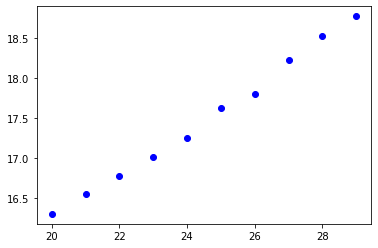

In [19]:
plt.plot(X,y,'ob')
plt.show() #puis on va afficher notre courbe 




In [20]:
from scipy import stats #on va calculer l'équation de cette courbe 
import numpy as py 
slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)  

In [21]:
slope #slope va donner pente a 

0.2784648484848485

In [22]:
intercept
#intercept donne b (eq sous forme de aX+b)

10.662461212121213

In [23]:
yy=[slope *u +intercept for u in X]

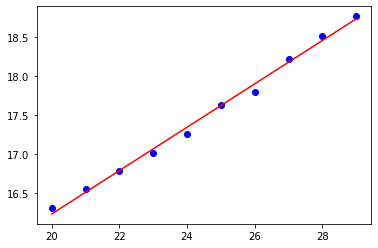

In [24]:
plt.plot(X,y,'ob',X,yy,'-r')#on va dessiner une droite 

E(X_n)-=0.278*n+10.662 

In [25]:
#et voila mon equation 